|<img style="float:left;" src="http://pierreproulx.espaceweb.usherbrooke.ca/images/usherb_transp.gif" > |Pierre Proulx, ing, professeur|
|:---|:---|
|Département de génie chimique et de génie biotechnologique |** GCH200-Phénomènes d'échanges I **|



### Section 18-2, diffusion binaire dans un milieu stagnant

<img src='http://pierreproulx.espaceweb.usherbrooke.ca/images/Chap-18-Section-18-2.png'>

Voir les hypothèses dans le livre de Transport Phenomena.


In [1]:
#
# Pierre Proulx
#
#
# Préparation de l'affichage et des outils de calcul symbolique
#
import sympy as sp
from IPython.display import *
sp.init_printing(use_latex=True)
%matplotlib inline

In [2]:
# Paramètres, variables et fonctions

z_1,z_2,z,D_AB,X_A1,X_A2,S,delta_z,C1,C2=sp.symbols('z_1,z_2,z,D_AB,X_A1,X_A2,S,delta_z,C1,C2')                                                            
N_A=sp.symbols('N_A')
X_A=sp.Function('X_A')(z)     

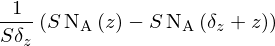

In [3]:
#
# Bilan sur la colonne de diffusion
#
eq=(S*N_A(z)-S*N_A(z+delta_z))/(S*delta_z)
display(eq)

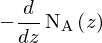

In [4]:
eq=sp.limit(eq,delta_z,0).doit()
display(eq)

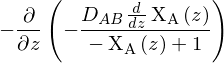

In [5]:
fick=-D_AB/(1-X_A)*sp.diff(X_A,z)
eq=eq.subs(N_A(z),fick)
display(eq)

In [6]:
X_A=sp.dsolve(eq,X_A)
display(X_A)

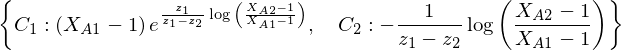

In [7]:
X_A=X_A.rhs
# Pose et solution des 2 équations de conditions aux limites pour C1 et C2
condition_1=sp.Eq(X_A.subs(z,z_1)-X_A1,0)
condition_2=sp.Eq(X_A.subs(z,z_2)-X_A2,0)
constantes=sp.solve([condition_1,condition_2],sp.symbols('C1,C2'),dict=True) # C1 et C2
constantes=constantes[0]         # ramener la liste contenant le dictionnaire des constantes
display(constantes)              # sous forme de dictionnaire

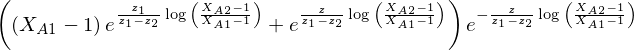

In [8]:
X_A=X_A.subs(constantes)             #
display(X_A.simplify())
#
# La forme de l'équation est lourde, voir plus bas pour formuler de façon plus simple.
#

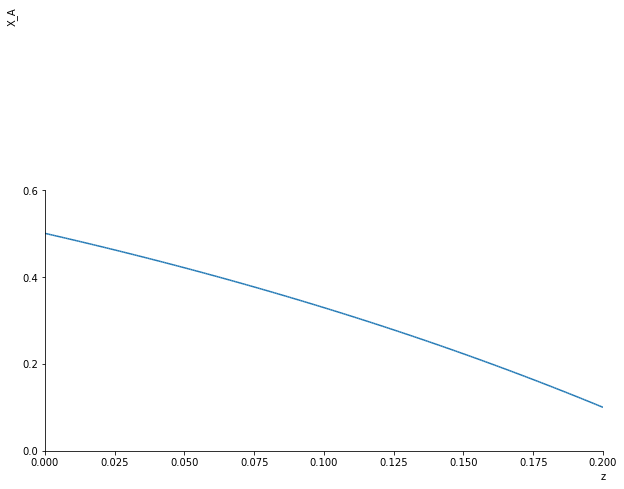

In [9]:
#
# Tracons avec des valeurs réalistes
#
dico={'z_1':0.00,'z_2':0.2,'X_A1':0.5,'X_A2':0.1}
X_Aplot=X_A.subs(dico)
display(X_Aplot)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=10,8
sp.plot(X_Aplot,(z,0.0,0.2),ylabel='X_A',ylim=[0,1],adaptive=False)

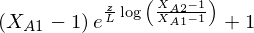

In [10]:
### Ici on peut regarder le profil de concentration en choisissant une géométrie
### un peu simplifiée, par exemple z1=0 et z2=L. Regardons si le profil serait plus simple
### à lire
X_As=X_A.subs(sp.symbols('z_1'),0)
X_As=X_As.subs(sp.symbols('z_2'),sp.symbols('L'))
display(X_As)
### De plus, on pourrait utiliser XB=XA-1
X_As=X_As.subs(sp.symbols('X_A1'),1-sp.symbols('X_B1'))
X_As=X_As.subs(sp.symbols('X_A2'),1-sp.symbols('X_B2'))
display(X_As.simplify())
### en effet, on aurait intérêt à utiliser une notation simplifiée ou z2-z1=L et z1=0.